In [29]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import sys
import cmath
import math

In [30]:
def dft(N):#returns dft matrix
    dft_matrix=np.empty([N,N],dtype=np.complex_)
    dft_matrix=np.matrix(dft_matrix)
    indices=np.arange(0,N,1)
    for k in indices:
        for n in indices:
            dft_matrix[k,n]=np.exp(-(1j)*2*np.pi*k*n/N)
        
    return dft_matrix

In [31]:
def idft(N):#returns dft matrix
    idft_matrix=np.empty([N,N],dtype=np.complex_)
    idft_matrix=np.matrix(idft_matrix)
    indices=np.arange(0,N,1)
    for k in indices:
        for n in indices:
            idft_matrix[k,n]=np.exp((1j)*2*np.pi*k*n/N)
    idft_matrix=idft_matrix/N        
    return idft_matrix

In [32]:
def dcft(N):#returns dcft matrix
    dcft_matrix=np.empty([N,N],dtype=np.complex_)
    dcft_matrix=np.matrix(dcft_matrix)
    indices=np.arange(0,N,1)
    for k in indices:
        for n in indices:
            dcft_matrix[k,n]=2*np.cos(np.pi*k*(2*n+1)/(2*N))
        
    return dcft_matrix

In [33]:
def idcft(N):#returns dcft matrix
    idcft_matrix=np.empty([N,N],dtype=np.complex_)
    idcft_matrix=np.matrix(idcft_matrix)
    indices=np.arange(0,N,1)
    for k in indices: 
        for n in indices:
            if n==0:
                alpha=0.5
            else:
                alpha=1
            idcft_matrix[k,n]=alpha*np.cos(np.pi*n*(2*k+1)/(2*N))
    idcft_matrix=idcft_matrix/N
    return idcft_matrix

In [34]:
def haar(N):
    if N==2:
        h2=np.matrix([[1,1],[1,-1]])
        return h2
    v=np.log2(N)-1
    hn2=haar(N/2)
    result1=np.concatenate((hn2,hn2),axis=1)
    matrix1=(pow(2,v/2))*np.identity(int(N/2))
    result2=np.concatenate((matrix1,-matrix1),axis=1)
    return np.concatenate((result1,result2),axis=0)
    

In [35]:
def ihaar(N):
    haar_matrix=haar(N)
    return np.transpose(haar_matrix)/N

In [36]:
def generalised_transform(transform_type,x):
    N=len(x)
    #print(N)
    if transform_type==0:
        gtm=dft(N)
    if transform_type==1:
        gtm=dcft(N)
    if transform_type==2:
        gtm=haar(N)
    return gtm*x    
        
        


In [37]:
def generalised_inverse_transform(transform_type,X):
    N=len(X)
    #print(N)
    if transform_type==0:
        igtm=idft(N)
    if transform_type==1:
        igtm=idcft(N)
    if transform_type==2:
        igtm=ihaar(N)
    return igtm*X 

In [38]:
def dot_product(x,y,N):
    err=x-y
    errt=np.transpose(err)
    errt=np.conjugate(errt)
    
    return errt*err/N


In [39]:
def xmdft(X,L,N):
    for i in range(int((N+1-L)/2),int((N-1+L)/2)+1,1):
        X[i]=0
    return X    

In [40]:
def  xdcthaar(X,L,N):
    for i in range(N-L,N):
        X[i]=0
    return X    

In [41]:
def mse(transform_type,x,X,N):
    err=[]
    for l in range(0,N,1):
        if transform_type==0:
            Xm=xmdft(X,l,N)
            xm=generalised_inverse_transform(0,Xm)
        if transform_type==1:
            Xm=xdcthaar(X,l,N)
            xm=generalised_inverse_transform(1,Xm)
        if transform_type==2:
            Xm=xdcthaar(X,l,N)
            xm=generalised_inverse_transform(2,Xm)
        err=np.append(err,dot_product(x,xm,N))
    return err 

[[31.41652463+31.53487763j]
 [-1.79211754 -0.89341631j]
 [-1.6103789  -1.96778761j]
 [-0.64947244 -4.59735412j]
 [-1.07322538 +0.85893902j]
 [ 0.80974694 -3.35953412j]
 [-3.16087577 +1.68285874j]
 [ 0.83671703 -0.42365619j]
 [ 2.16829214 -2.79327378j]
 [-0.47756824 -3.54040485j]
 [-0.50779361 +0.2721079j ]
 [-2.2116879  -2.59084069j]
 [-1.84680467 +1.32193738j]
 [-2.62965786 +1.86412226j]
 [-3.03529879 +0.66864022j]
 [ 1.4391842  -0.35201864j]
 [-2.15374437 +3.58122445j]
 [-2.87238858 +5.56272214j]
 [ 0.90521589 -1.05357181j]
 [ 0.97988993 -2.25790702j]
 [-3.74229266 +1.06976229j]
 [-1.34343029 +2.16909187j]
 [ 2.28120858 -0.59644365j]
 [ 2.99419735 +0.86999427j]
 [-0.06513977 +0.72991306j]
 [-2.40197474 -2.06220054j]
 [ 0.06226981 -0.71444774j]
 [ 2.6562892  -4.02082843j]
 [-0.33562437 +0.89740475j]
 [ 3.16140996 +1.01260263j]
 [ 0.85471579 +1.81278432j]
 [ 0.13497425 -2.74952231j]
 [ 0.37410157 -0.51354586j]
 [ 1.26234433 +0.21727659j]
 [-5.41864629 +0.92381434j]
 [-0.53915197 -1.077

C:\Users\User\Downloads\New folder\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[[ 6.28330493e+01+6.30697553e+01j]
 [ 5.26929425e+00-2.99069398e+00j]
 [-2.12932798e+00+1.11206457e+00j]
 [ 3.48228424e+00-2.51991730e+00j]
 [ 1.00756058e+00-2.79284453e-02j]
 [ 3.16729978e+00+3.70675461e+00j]
 [-4.40235957e+00-1.00841908e+00j]
 [-5.73887228e+00-1.65333770e-02j]
 [-2.39924842e+00+9.58832084e-02j]
 [ 2.66274064e+00+9.30535093e-01j]
 [-3.23334426e+00-1.49239472e+00j]
 [-4.88482946e+00-2.64922416e+00j]
 [-4.98912087e+00+3.62007883e+00j]
 [-8.14928304e-01+4.80985662e-01j]
 [-2.77184821e+00-2.82094314e+00j]
 [ 2.85453644e+00-3.79104389e+00j]
 [-1.20721269e+00-2.94853166e+00j]
 [-1.52361773e+00-8.19097463e+00j]
 [ 2.84182964e-01-4.08809173e+00j]
 [-7.21813001e-01-2.90946894e+00j]
 [ 1.75576220e+00+5.25391143e+00j]
 [-5.43693520e+00-4.46216346e+00j]
 [ 9.03670558e-01-2.20199182e+00j]
 [-4.46795375e+00+3.65803123e+00j]
 [-2.50355684e+00+2.46091680e+00j]
 [-3.42170005e+00-2.85201713e+00j]
 [ 1.87654334e+00+2.70060344e+00j]
 [-4.09148683e-01-2.54192455e-01j]
 [ 1.32216578e+00+3.

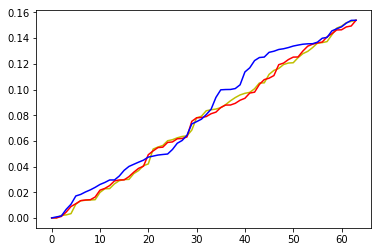

In [42]:
# input sequence generator
length=64
real=np.random.rand(length)
img=np.random.rand(length)
x=real+1j*img
x=np.matrix(x)
x=np.transpose(x)
color=['y','r','b']
for i in range(0,3,1):
    X=generalised_transform(i,x)
    print(X)
    err=mse(i,x,X,length)
    print(err.shape)
    plt.plot(np.arange(0,length,1),err,color[i])

#y=generalised_inverse_transform(0,X)

